In [1]:
#importing required libraries
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import contextily as ctx
import os
import torch
from tqdm import tqdm
np.random.seed(42)

In [2]:
df  = pd.read_csv('/Users/akashpatel/Tokyo.csv')


In [3]:
df.head()


,Pid,Departure_time,Gender,Age,Occupation,Trip_type,Origin,Destination
0,264045,2008-10-01 09:00:00,2,10,9,1,11412,11414
1,268173,2008-10-01 10:42:00,2,15,14,4,12302,12303
2,277618,2008-10-01 13:35:00,2,5,14,8,13131,13110
3,277618,2008-10-01 15:02:00,2,5,14,4,13110,13110
4,264180,2008-10-01 12:45:00,1,14,15,4,12304,11421


In [4]:
df = df.loc[:, df.columns != 'Departure_time']
df.head()

,Pid,Gender,Age,Occupation,Trip_type,Origin,Destination
0,264045,2,10,9,1,11412,11414
1,268173,2,15,14,4,12302,12303
2,277618,2,5,14,8,13131,13110
3,277618,2,5,14,4,13110,13110
4,264180,1,14,15,4,12304,11421


In [5]:
df_Zone = pd.read_csv('/Users/akashpatel/Downloads/ieee-bigdata-cup-2022-destination-prediction/Zone_features/Zone_features/Tokyo_zone_feature_area.csv')

In [6]:
df_Zone.head()

,ZONE_ID,T000918002,T000918006,T000918021,T000918025,T000847001
0,100,17.997728,331.128339,2814.349670,21589.800171,179.328433
1,101,33.522479,601.750328,4566.073397,20151.124284,3551.697613
2,102,179.612460,2754.747270,10573.439547,183664.745235,1106.984438
3,103,128.735198,3527.181556,18151.752537,184695.318024,102.987980
4,110,50.396136,1607.310595,3285.225513,48681.330840,3164.807818


In [7]:
df_Zone.rename(columns={"T000918002": "business_secondary"},inplace=True)
df_Zone.rename(columns={"T000918006": "employees_secondary"},inplace=True)
df_Zone.rename(columns={"T000918021": "business_tertiary"},inplace=True)
df_Zone.rename(columns={"T000918025": "employees_tertiary"},inplace=True)
df_Zone.rename(columns={"T000847001": "Night_Population"},inplace=True)


In [8]:
df_Zone.head()

print(df_Zone.shape)

(1316, 6)


In [9]:
# unique origin locations 
filtered_df = df.query('`Trip_type` == 5')
u = filtered_df['Origin'].astype(str)+ "," + filtered_df['Destination'].astype(str)
u.nunique()
filtered_df
#x.head()

,Pid,Gender,Age,Occupation,Trip_type,Origin,Destination
9,260471,2,10,99,5,11302,10132
10,262161,1,13,15,5,12231,12231
27,276257,1,6,8,5,11102,10222
28,276257,1,6,8,5,10222,10220
29,276257,1,6,8,5,10220,11221
...,...,...,...,...,...,...,...
790516,374414,2,2,11,5,60800,60800
790549,376069,2,12,14,5,60600,220
790553,360411,1,5,8,5,23131,23135
790565,369759,1,14,3,5,60000,60000


In [10]:
#dffinal = pd.merge(df,dfz)
df_1 = filtered_df.merge(df_Zone, left_on='Origin', right_on='ZONE_ID')
df_full = df_1.merge(df_Zone, left_on='Destination', right_on='ZONE_ID', suffixes=('_origin', '_destination'))
df_full.head()

,Pid,Gender,Age,Occupation,Trip_type,Origin,Destination,ZONE_ID_origin,business_secondary_origin,employees_secondary_origin,business_tertiary_origin,employees_tertiary_origin,Night_Population_origin,ZONE_ID_destination,business_secondary_destination,employees_secondary_destination,business_tertiary_destination,employees_tertiary_destination,Night_Population_destination
0,260471,2,10,99,5,11302,10132,11302,9.608544,129.358493,119.832998,1301.143389,6233.585830,10132,100.000002,3812.006179,3449.092305,85411.192996,8280.615084
1,260472,2,5,15,5,11302,10132,11302,9.608544,129.358493,119.832998,1301.143389,6233.585830,10132,100.000002,3812.006179,3449.092305,85411.192996,8280.615084
2,363992,2,9,7,5,10222,10132,10222,57.573480,1242.671128,926.456267,23114.615932,1712.456459,10132,100.000002,3812.006179,3449.092305,85411.192996,8280.615084
3,266593,2,3,12,5,10220,10132,10220,91.486901,2248.078832,1086.476905,29974.039540,16888.180799,10132,100.000002,3812.006179,3449.092305,85411.192996,8280.615084
4,358612,1,12,3,5,10110,10132,10110,159.639796,4190.458354,3131.939222,83303.103551,9032.669371,10132,100.000002,3812.006179,3449.092305,85411.192996,8280.615084


In [15]:
#G.add_nodes_from([2, 3])
import numpy as np

# df_edges = df_full.drop_duplicates(subset=['Origin', 'Destination'])
# df_edges.shape

e1 = np.array(df_full["Origin"]).reshape((-1,1))
e2 = np.array(df_full["Destination"]).reshape((-1,1))
print (e1.shape, e2.shape)
e = np.unique(np.vstack((e1,e2)).squeeze()).tolist()
mapped_zone_id_vs_zone_id = {val: i for i, val in enumerate(e)}


# identity_matrix = identity_matrix = np.eye(len(df_sample["Origin"]))
# n = np.dot(identity_matrix, df_sample["Origin"])
# print(n)

print (len(mapped_zone_id_vs_zone_id))


(60933, 1) (60933, 1)
1303


In [16]:
df_full['mapped_Origin'] = df_full['Origin'].apply(lambda x : mapped_zone_id_vs_zone_id[x])
df_full['mapped_Destination'] = df_full['Destination'].apply(lambda x : mapped_zone_id_vs_zone_id[x])

In [17]:
df_full

,Pid,Gender,Age,Occupation,Trip_type,Origin,Destination,ZONE_ID_origin,business_secondary_origin,employees_secondary_origin,...,employees_tertiary_origin,Night_Population_origin,ZONE_ID_destination,business_secondary_destination,employees_secondary_destination,business_tertiary_destination,employees_tertiary_destination,Night_Population_destination,mapped_Origin,mapped_Destination
0,260471,2,10,99,5,11302,10132,11302,9.608544,129.358493,...,1301.143389,6233.585830,10132,100.000002,3812.006179,3449.092305,85411.192996,8280.615084,468,425
1,260472,2,5,15,5,11302,10132,11302,9.608544,129.358493,...,1301.143389,6233.585830,10132,100.000002,3812.006179,3449.092305,85411.192996,8280.615084,468,425
2,363992,2,9,7,5,10222,10132,10222,57.573480,1242.671128,...,23114.615932,1712.456459,10132,100.000002,3812.006179,3449.092305,85411.192996,8280.615084,435,425
3,266593,2,3,12,5,10220,10132,10220,91.486901,2248.078832,...,29974.039540,16888.180799,10132,100.000002,3812.006179,3449.092305,85411.192996,8280.615084,433,425
4,358612,1,12,3,5,10110,10132,10110,159.639796,4190.458354,...,83303.103551,9032.669371,10132,100.000002,3812.006179,3449.092305,85411.192996,8280.615084,417,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60928,322638,1,5,4,5,23113,23113,23113,5.111495,21.247754,...,115.308360,1776.018332,23113,5.111495,21.247754,26.016062,115.308360,1776.018332,712,712
60929,322638,1,5,4,5,23113,23113,23113,5.111495,21.247754,...,115.308360,1776.018332,23113,5.111495,21.247754,26.016062,115.308360,1776.018332,712,712
60930,327529,1,5,8,5,29330,29330,29330,2.410369,5.218406,...,29.985199,149.226989,29330,2.410369,5.218406,17.517375,29.985199,149.226989,911,911
60931,364182,2,1,11,5,26300,26301,26300,5.273770,12.358815,...,61.311899,516.401456,26301,12.684564,69.668578,58.745354,334.659581,1786.877785,796,797


In [18]:
ed1 = np.array(df_full["mapped_Origin"])
ed2 = np.array(df_full["mapped_Destination"])

ed = np.column_stack((ed1,ed2)).T
ed.shape

(2, 60933)

In [27]:
df_node = df_full.drop_duplicates(subset=['mapped_Origin','mapped_Destination'])
a1 = np.array(df_node["mapped_Origin"])
b1 = np.array(df_node["business_secondary_origin"])
c1 = np.array(df_node["employees_secondary_origin"])
d1 = np.array(df_node["business_tertiary_origin"])
e1 = np.array(df_node["employees_tertiary_origin"])
f1 = np.array(df_node["Night_Population_origin"])
n = np.column_stack((a1,b1,c1,d1,e1,f1))

print(n)
df_node


[[4.68000000e+02 9.60854387e+00 1.29358493e+02 1.19832998e+02
  1.30114339e+03 6.23358583e+03]
 [4.35000000e+02 5.75734799e+01 1.24267113e+03 9.26456267e+02
  2.31146159e+04 1.71245646e+03]
 [4.33000000e+02 9.14869010e+01 2.24807883e+03 1.08647691e+03
  2.99740395e+04 1.68881808e+04]
 ...
 [9.11000000e+02 2.41036898e+00 5.21840618e+00 1.75173750e+01
  2.99851993e+01 1.49226989e+02]
 [7.96000000e+02 5.27376961e+00 1.23588146e+01 2.73472976e+01
  6.13118992e+01 5.16401456e+02]
 [8.36000000e+02 7.59126000e-01 1.57789829e+00 9.59281818e+00
  1.46823233e+01 7.27901068e+01]]


,Pid,Gender,Age,Occupation,Trip_type,Origin,Destination,ZONE_ID_origin,business_secondary_origin,employees_secondary_origin,...,employees_tertiary_origin,Night_Population_origin,ZONE_ID_destination,business_secondary_destination,employees_secondary_destination,business_tertiary_destination,employees_tertiary_destination,Night_Population_destination,mapped_Origin,mapped_Destination
0,260471,2,10,99,5,11302,10132,11302,9.608544,129.358493,...,1301.143389,6233.585830,10132,100.000002,3812.006179,3449.092305,85411.192996,8280.615084,468,425
2,363992,2,9,7,5,10222,10132,10222,57.573480,1242.671128,...,23114.615932,1712.456459,10132,100.000002,3812.006179,3449.092305,85411.192996,8280.615084,435,425
3,266593,2,3,12,5,10220,10132,10220,91.486901,2248.078832,...,29974.039540,16888.180799,10132,100.000002,3812.006179,3449.092305,85411.192996,8280.615084,433,425
4,358612,1,12,3,5,10110,10132,10110,159.639796,4190.458354,...,83303.103551,9032.669371,10132,100.000002,3812.006179,3449.092305,85411.192996,8280.615084,417,425
19,50732,1,10,8,5,14210,10132,14210,73.341190,357.433776,...,3397.061759,16350.661792,10132,100.000002,3812.006179,3449.092305,85411.192996,8280.615084,589,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60925,434639,2,15,15,5,39111,39111,39111,0.083315,0.138888,...,0.319750,4.388191,39111,0.083315,0.138888,0.694346,0.319750,4.388191,1097,1097
60926,335293,2,13,14,5,23113,23113,23113,5.111495,21.247754,...,115.308360,1776.018332,23113,5.111495,21.247754,26.016062,115.308360,1776.018332,712,712
60930,327529,1,5,8,5,29330,29330,29330,2.410369,5.218406,...,29.985199,149.226989,29330,2.410369,5.218406,17.517375,29.985199,149.226989,911,911
60931,364182,2,1,11,5,26300,26301,26300,5.273770,12.358815,...,61.311899,516.401456,26301,12.684564,69.668578,58.745354,334.659581,1786.877785,796,797


In [61]:
#Define the data for GCN

import torch
from torch import Tensor
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, x: Tensor, edge_index: Tensor) -> Tensor:
        # x: Node feature matrix of shape [num_nodes, in_channels]
        # edge_index: Graph connectivity matrix of shape [2, num_edges]
        x = self.conv1(x, edge_index).relu()
        x = self.conv2(x, edge_index).sigmoid()
        return x
model = GCN(6, 1, 1)

In [62]:
from torch_geometric.data import Data
edge_index = torch.tensor(ed, dtype=torch.long)
x = torch.tensor((n), dtype=torch.float)

In [63]:
data = Data(x=x, edge_index=edge_index)

In [64]:
data.x.shape, data.edge_index.shape

(torch.Size([22735, 6]), torch.Size([2, 60933]))

In [65]:
#Foward pass

model(data.x, data.edge_index)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        ...,
        [0.0000],
        [0.0000],
        [0.0000]], grad_fn=<SigmoidBackward0>)

/var/folders/cm/gydxnn213wnfgk1p3pqs31x40000gn/T/ipykernel_54528/883865700.py:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(221)
/var/folders/cm/gydxnn213wnfgk1p3pqs31x40000gn/T/ipykernel_54528/883865700.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(222)


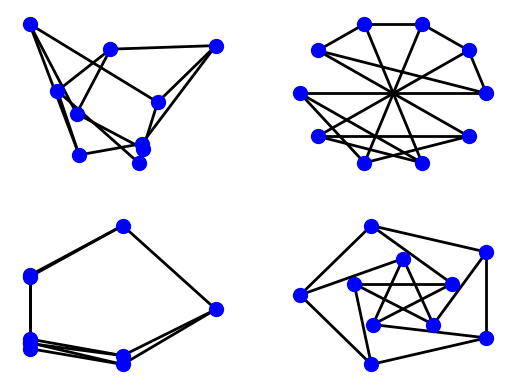

In [66]:
import matplotlib.pyplot as plt
import networkx as nx
G = nx.petersen_graph()
plt.subplot(121)
nx.draw(G, with_labels=False, font_weight='bold')
plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=False, font_weight='bold')

options = {
   'node_color': 'blue',
   'node_size': 100,
   'width': 2,
}
plt.subplot(221)
nx.draw_random(G, **options)
plt.subplot(222)
nx.draw_circular(G, **options)
plt.subplot(223)
nx.draw_spectral(G, **options)
plt.subplot(224)
nx.draw_shell(G, nlist=[range(5,10), range(5)], **options)

In [67]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GraphNet(nn.Module):
    def __init__(self, num_features, hidden_channels, num_classes):
        super(GraphNet, self).__init__()
        self.conv1 = GCNConv(num_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)

        return F.log_softmax(x, dim=1)

In [68]:
from torch_geometric.data import Data

In [95]:
df_node = df_full.drop_duplicates(subset=['mapped_Origin','mapped_Destination'])
a1 = np.array(df_node["mapped_Origin"])
b1 = np.array(df_node["business_secondary_origin"])
c1 = np.array(df_node["employees_secondary_origin"])
d1 = np.array(df_node["business_tertiary_origin"])
e1 = np.array(df_node["employees_tertiary_origin"])
f1 = np.array(df_node["Night_Population_origin"])
n = np.column_stack((a1,b1,c1,d1,e1,f1))

print(n)
df_node


[[4.68000000e+02 9.60854387e+00 1.29358493e+02 1.19832998e+02
  1.30114339e+03 6.23358583e+03]
 [4.35000000e+02 5.75734799e+01 1.24267113e+03 9.26456267e+02
  2.31146159e+04 1.71245646e+03]
 [4.33000000e+02 9.14869010e+01 2.24807883e+03 1.08647691e+03
  2.99740395e+04 1.68881808e+04]
 ...
 [9.11000000e+02 2.41036898e+00 5.21840618e+00 1.75173750e+01
  2.99851993e+01 1.49226989e+02]
 [7.96000000e+02 5.27376961e+00 1.23588146e+01 2.73472976e+01
  6.13118992e+01 5.16401456e+02]
 [8.36000000e+02 7.59126000e-01 1.57789829e+00 9.59281818e+00
  1.46823233e+01 7.27901068e+01]]


,Pid,Gender,Age,Occupation,Trip_type,Origin,Destination,ZONE_ID_origin,business_secondary_origin,employees_secondary_origin,...,employees_tertiary_origin,Night_Population_origin,ZONE_ID_destination,business_secondary_destination,employees_secondary_destination,business_tertiary_destination,employees_tertiary_destination,Night_Population_destination,mapped_Origin,mapped_Destination
0,260471,2,10,99,5,11302,10132,11302,9.608544,129.358493,...,1301.143389,6233.585830,10132,100.000002,3812.006179,3449.092305,85411.192996,8280.615084,468,425
2,363992,2,9,7,5,10222,10132,10222,57.573480,1242.671128,...,23114.615932,1712.456459,10132,100.000002,3812.006179,3449.092305,85411.192996,8280.615084,435,425
3,266593,2,3,12,5,10220,10132,10220,91.486901,2248.078832,...,29974.039540,16888.180799,10132,100.000002,3812.006179,3449.092305,85411.192996,8280.615084,433,425
4,358612,1,12,3,5,10110,10132,10110,159.639796,4190.458354,...,83303.103551,9032.669371,10132,100.000002,3812.006179,3449.092305,85411.192996,8280.615084,417,425
19,50732,1,10,8,5,14210,10132,14210,73.341190,357.433776,...,3397.061759,16350.661792,10132,100.000002,3812.006179,3449.092305,85411.192996,8280.615084,589,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60925,434639,2,15,15,5,39111,39111,39111,0.083315,0.138888,...,0.319750,4.388191,39111,0.083315,0.138888,0.694346,0.319750,4.388191,1097,1097
60926,335293,2,13,14,5,23113,23113,23113,5.111495,21.247754,...,115.308360,1776.018332,23113,5.111495,21.247754,26.016062,115.308360,1776.018332,712,712
60930,327529,1,5,8,5,29330,29330,29330,2.410369,5.218406,...,29.985199,149.226989,29330,2.410369,5.218406,17.517375,29.985199,149.226989,911,911
60931,364182,2,1,11,5,26300,26301,26300,5.273770,12.358815,...,61.311899,516.401456,26301,12.684564,69.668578,58.745354,334.659581,1786.877785,796,797


In [96]:
# Convert data to PyTorch tensors
x = torch.tensor((n), dtype=torch.float)
y = torch.tensor(df_full["mapped_Destination"].values, dtype=torch.long)

In [97]:
# Create PyG Data object
data = Data(x=x, edge_index=edge_index.t().contiguous(), y=y)
data.x.shape, data.edge_index.shape

(torch.Size([22735, 6]), torch.Size([60933, 2]))

In [98]:
# Create and train the GNN model
num_features = 3  # Number of input features for each node
hidden_channels = 64  # Number of hidden channels in the GNN layers
num_classes = df_full["mapped_Destination"].nunique()  # Number of destination zones


In [99]:
model = GraphNet(num_features, hidden_channels, num_classes)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.NLLLoss()


In [111]:
# Create an empty graph
G = nx.MultiGraph()

# Add nodes to the graph for each unique card_id, merchant_name
G.add_nodes_from(df_full["mapped_Destination"].unique(), type='destination zone')
G.add_nodes_from(df_full["mapped_Origin"].unique(), type='origin zone')

In [113]:
# Add edges and properties to the edges 
for _, row in df_full.iterrows():
    # Create a variable for each properties for each edge
    
        business_secondary_origin = row["business_secondary_origin"],
        employees_secondary_origin = row["employees_secondary_origin"],
        business_tertiary_origin = row["business_tertiary_origin"],
        employees_tertiary_origin = row["employees_tertiary_origin"],
        Night_Population_origin =row["Night_Population_origin"],
        
 
        G.add_edge(row['mapped_Destination'], row['mapped_Origin'], business_secondary_origin = business_secondary_origin , employees_secondary_origin = employees_secondary_origin , business_tertiary_origin = business_tertiary_origin ,
              employees_tertiary_origin = employees_tertiary_origin , Night_Population_origin = Night_Population_origin)

In [114]:
# Get the number of nodes and edges in the graph
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

# Print the number of nodes and edges
print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)

Number of nodes: 1303
Number of edges: 60933


In [115]:
# Convert the graph to an adjacency matrix
adj_matrix = nx.adjacency_matrix(G).todense()


In [152]:
adj_matrix.shape


(1303, 1303)

In [117]:
# Get a small sample of the nodes in the graph
sample_nodes = list(G.nodes())[:10]

# Retrieve the properties of the sample nodes
node_properties = nx.get_node_attributes(G, 'type')

# Print the properties of the sample nodes
for node in sample_nodes:
    print(f"Node: {node}, Properties: {node_properties[node]}")

Node: 425, Properties: origin zone
Node: 471, Properties: origin zone
Node: 475, Properties: origin zone
Node: 470, Properties: origin zone
Node: 468, Properties: origin zone
Node: 432, Properties: origin zone
Node: 451, Properties: origin zone
Node: 469, Properties: origin zone
Node: 14, Properties: origin zone
Node: 445, Properties: origin zone


In [118]:
sample_size = 5
for i, edge in enumerate(G.edges()):
    print(G.get_edge_data(*edge))
    if i >= sample_size - 1:
        break

{0: {'business_secondary_origin': (9.6085438686979,), 'employees_secondary_origin': (129.35849320085333,), 'business_tertiary_origin': (119.83299777894725,), 'employees_tertiary_origin': (1301.1433893831636,), 'Night_Population_origin': (6233.585830129226,)}, 1: {'business_secondary_origin': (9.6085438686979,), 'employees_secondary_origin': (129.35849320085333,), 'business_tertiary_origin': (119.83299777894725,), 'employees_tertiary_origin': (1301.1433893831636,), 'Night_Population_origin': (6233.585830129226,)}}
{0: {'business_secondary_origin': (9.6085438686979,), 'employees_secondary_origin': (129.35849320085333,), 'business_tertiary_origin': (119.83299777894725,), 'employees_tertiary_origin': (1301.1433893831636,), 'Night_Population_origin': (6233.585830129226,)}, 1: {'business_secondary_origin': (9.6085438686979,), 'employees_secondary_origin': (129.35849320085333,), 'business_tertiary_origin': (119.83299777894725,), 'employees_tertiary_origin': (1301.1433893831636,), 'Night_Popul

In [123]:

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import networkx as nx
import torch
import torch.nn as nn
import torch.nn.functional as F



In [126]:
# Retrieve the properties errors of all the edges
edge_properties = nx.get_edge_attributes(G, 'errors')

# Count the number of edges by property value
edge_count_by_property = Counter(edge_properties.values())

# Print the count of edges by property value
for property_value, count in edge_count_by_property.items():
    
    print(f"Property value: {property_value}, Count: {count}")

In [127]:
# Prepare the data for input into the model
edge_list = list(G.edges(data=True))

In [128]:
list(edge_list[i][2].values())

[(100.00000189235226,),
 (3812.006178876775,),
 (3449.0923049421435,),
 (85411.1929961545,),
 (8280.615083526998,)]

In [157]:
class TripGNN(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(TripGNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, 1)
        
    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return x.squeeze(-1)

# Prepare the data for input into the model
edge_list = list(G.edges(data=True))
x = []
for edge in edge_list:
    edge_values = list(edge[2].values())
    edge_values = [float(i[0]) if type(i) == tuple and type(i[0]) == str else i[0] if type(i) == tuple else i for i in edge_values]
    x.append(edge_values)
x = torch.tensor(x, dtype=torch.float)

x.shape

torch.Size([60933, 5])

In [154]:
df_target = torch.eye(num_nodes)
print(df_target)
#df_target = torch.tensor(df_target)
target = torch.tensor(df_target, dtype=torch.float)

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]])


/var/folders/cm/gydxnn213wnfgk1p3pqs31x40000gn/T/ipykernel_54528/3199405024.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  target = torch.tensor(df_target, dtype=torch.float)
